In [1]:
import tdt
import glob
import os
import pathlib
import re

from med_associates_utils import SessionCollection, Session, parse_tdt_directory

from med_associates_utils.viz import plot_cumulative_events, plot_event_raster

In [2]:
sessions = parse_tdt_directory(r'M:\2024 July,Aug GRABDA2m data (DLS C1906Y)/misc/RI30-240715-091011', pattern='EN*')

def add_metadata(session):
    session.metadata['animal'] = session.metadata['blockname'].split('_')[0]
    session.metadata['day'] = re.search("RI[36]0([DR].+?)-", session.metadata['blockname'])[1]

sessions.apply(add_metadata)

sessions.describe()
sessions[0].describe()

  0%|          | 0/27 [00:00<?, ?it/s]

read from t=0s to t=1799.2s
read from t=0s to t=1798.97s
read from t=0s to t=1799.19s
read from t=0s to t=1799.21s
read from t=0s to t=1799.09s
read from t=0s to t=1799.19s
read from t=0s to t=1849.54s
read from t=0s to t=1799.3s
read from t=0s to t=1799.19s
read from t=0s to t=1799.2s
read from t=0s to t=1799.2s
read from t=0s to t=1799.11s
read from t=0s to t=1799.1s
read from t=0s to t=1799.1s
read from t=0s to t=1799.09s
read from t=0s to t=1799.1s
read from t=0s to t=1799.09s
read from t=0s to t=1799.2s
read from t=0s to t=1799.21s
read from t=0s to t=1799.31s
read from t=0s to t=1799.1s
read from t=0s to t=1799.11s
read from t=0s to t=1799.06s
read from t=0s to t=1799.11s
read from t=0s to t=1799.11s
read from t=0s to t=1799.1s
read from t=0s to t=1798.97s
Number of sessions: 27

Arrays present in data with counts:
(27) "Cam1"
(27) "P1SC"
(27) "UnNP"
(26) "RMG_"
(27) "URM_"
(26) "RNP_"
(27) "Nose"
(27) "Tick"

Scalars present in data with counts:


Metadata:
    tankpath: M:\2024

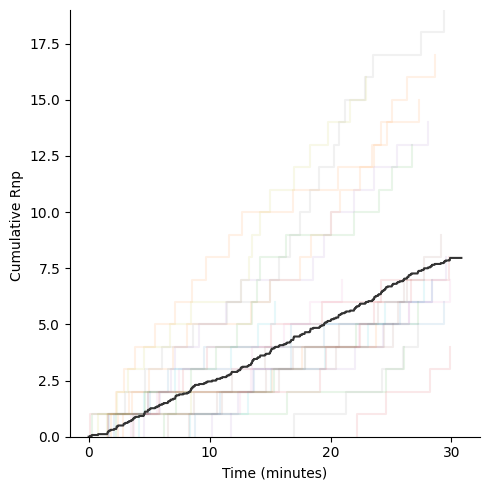

In [3]:
event_df = sessions.to_dataframe(include_meta=['day', 'animal'])
result = plot_cumulative_events(event_df, event='RNP_', individual=['animal', 'day'], hue=None)

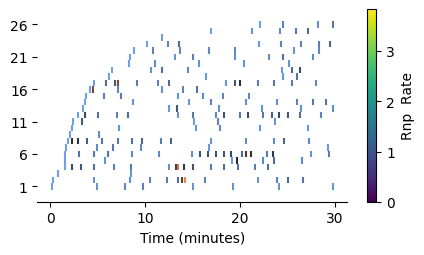

In [4]:
result = plot_event_raster(event_df, event='RNP_', individual=['animal', 'day'], sort_metric='ttf')